# Linear Regression Model

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
This code is the implementation of linear regression model for yield 
predication.

We are using linear regression model which is imported from Sklearn library.

Data is comprised of 234 samples. Each training sample is consist of 16 input
features(x1,x2,x3,....) and corresponding output(y) i.e yield.

x1= Flied 
x2= Seed
x3= max temp
x4= min temp
x5= Wind speed
x6= humidity
x7= Precipitation
x8= Rain fall
x9= N
x10=P
x11=K
x12=NDVI
x13=NDMI
x14=MSAVI
x15=NRDE
x16= Soil fertility

y= Yield 

linear model
h=theta0+ theta1*x1+ theta2*x2+ theta3*x3 .......theta16*x16

these theta's are trained during training.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

1. Importing required packages.
2. Read the data/load the data.
3. Data Cleaning.
4. Visualizing the data, how data looks like.
5. Spliting dataset into training and testing data.
6. Imported Linear regression model is Trained using training data
7. Predication is performed by trained model using testing data
8. Evaluate the Model: Measure the Mean Sqaure Error
9. Prediction for the new sample



# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  mean_absolute_error


#  Read the data/load the data

In [2]:
# we are using pandas libaray for reading the file
# We are reading ecxel file and path should be where you ecxel file is located.
# place "r" before the path string to address special character,such as '\'.
# Don't forget to put the file name at the end of the path + '.xlsx'

data=pd.read_excel(r"C:\python\Yield Predicition\sugarrow.xlsx")


In [3]:
#Showing the first five entries of data
data.head()

,Location,Seed,N,P,K,Soil Fertlity,mt1,mt2,mt3,mt4,...,NDRE5,NDRE6,NDRE7,NDRE8,NDRE9,NDRE10,NDRE11,NDRE12,ndre,Yield
0,11,21,103,57,50,2,21.2,28.6,34.3,31.7,...,0.00,-0.02,0.19,0.17,0.26,0.16,0.02,-0.02,0.045833,818
1,11,21,103,57,50,2,27.6,26.3,31.9,34.4,...,0.21,0.18,0.28,0.35,0.27,0.23,0.12,-0.01,0.149167,836
2,11,21,69,23,25,1,21.2,28.6,34.3,31.7,...,0.06,0.09,0.24,0.18,0.20,0.12,0.09,-0.11,0.046667,615
3,11,21,102,56,50,1,27.6,26.3,31.9,34.4,...,0.02,0.15,0.29,0.30,0.25,0.16,0.09,-0.06,0.104167,719
4,11,22,103,57,50,2,25.8,27.7,41.7,44.9,...,0.06,0.09,0.24,0.18,0.20,0.12,0.09,-0.11,0.046667,592


# Data Cleaning

In [4]:
# As there some extra columns so we need to perform data cleaning

#data.drop(columns='Month', inplace=True)
#data.head()

# Visualizing the data, how data looks like.

In [5]:
# Information about your data, how many entries and which type of data is present in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 137 entries, Location to Yield
dtypes: float64(130), int64(7)
memory usage: 107.2 KB


In [6]:
#tells the shape of dataframe
data.shape

(100, 137)

<AxesSubplot:xlabel='NDRE12', ylabel='Yield'>

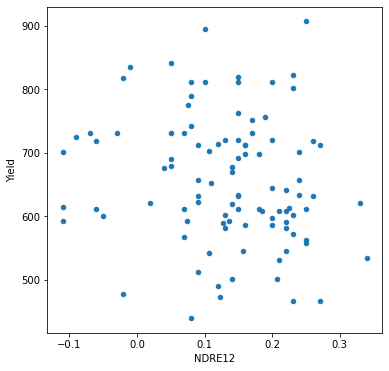

In [7]:
data.plot(kind='scatter', x='NDRE12', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='NDRE8', ylabel='Yield'>

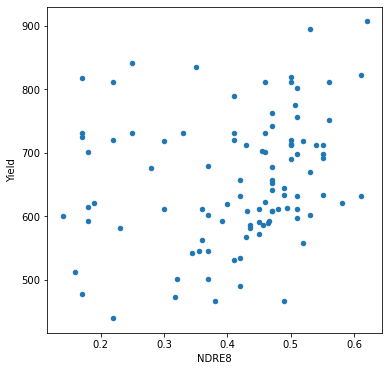

In [8]:
data.plot(kind='scatter', x='NDRE8', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='ndre', ylabel='Yield'>

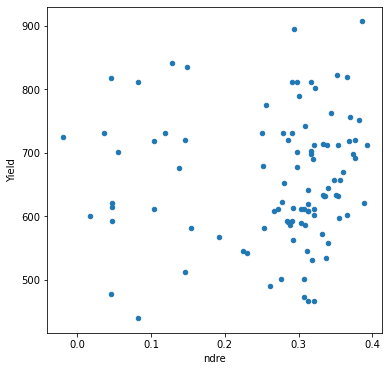

In [9]:
data.plot(kind='scatter', x='ndre', y='Yield', figsize=(6,6))

# Spliting dataset into training and testing data

Total of 60 samples we are taking first 190 samples as training data and last 44 samples as testing data

In [10]:
#Training data
training_data=data.iloc[:80, 0:18]
training_data.head()

,Location,Seed,N,P,K,Soil Fertlity,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,mt12
0,11,21,103,57,50,2,21.2,28.6,34.3,31.7,42.9,40.3,38.4,37.4,33.2,26.2,18.8,19.2
1,11,21,103,57,50,2,27.6,26.3,31.9,34.4,36.9,41.1,36.3,38.3,32.2,21.7,23.7,27.6
2,11,21,69,23,25,1,21.2,28.6,34.3,31.7,42.9,40.3,38.4,37.4,33.2,26.2,18.8,19.2
3,11,21,102,56,50,1,27.6,26.3,31.9,34.4,36.9,41.1,36.3,38.3,32.2,21.7,23.7,27.6
4,11,22,103,57,50,2,25.8,27.7,41.7,44.9,42.8,39.3,36.3,36.8,32.3,29.1,22.5,18.5


In [11]:
training_data.shape

(80, 18)

In [12]:
training_data.describe()

,Location,Seed,N,P,K,Soil Fertlity,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,mt12
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,13.025000,22.17500,92.187500,46.437500,42.987500,2.012500,27.398333,31.593750,37.985833,41.631250,44.340417,43.976875,41.509792,40.776458,36.790625,29.413750,24.853274,22.883333
std,1.750045,0.75933,24.081136,17.312353,11.522673,0.787461,4.498665,5.573322,3.637652,5.354203,3.775684,3.721882,3.525246,3.420157,4.355107,4.787715,3.477585,3.814592
min,11.000000,21.00000,40.000000,23.000000,0.000000,1.000000,19.000000,20.000000,31.900000,31.700000,36.900000,35.000000,34.000000,28.000000,23.000000,21.000000,18.800000,18.000000
25%,11.000000,22.00000,70.500000,25.000000,34.250000,1.000000,24.000000,28.175000,35.375000,38.000000,42.900000,41.100000,38.400000,38.300000,33.200000,26.200000,23.000000,20.000000
50%,14.000000,22.00000,107.000000,50.000000,50.000000,2.000000,27.600000,30.000000,38.250000,42.000000,45.000000,43.500000,41.550000,41.000000,37.100000,29.000000,25.000000,22.333333
75%,15.000000,23.00000,110.000000,60.000000,50.000000,3.000000,29.050000,34.400000,40.250000,46.000000,47.000000,47.000000,44.000000,43.000000,40.000000,33.000000,28.000000,25.000000
max,15.000000,23.00000,120.000000,69.000000,50.000000,3.000000,44.000000,48.000000,47.000000,49.000000,50.000000,51.000000,49.000000,49.000000,44.000000,41.000000,31.000000,41.000000


In [13]:
training_label=data.iloc[:80, -1]
training_label.head()

0    818
1    836
2    615
3    719
4    592
Name: Yield, dtype: int64

In [14]:
print('shape:', training_label.shape)
print('type:', training_label.dtype)

shape: (80,)
type: int64


In [15]:
#testing data

testing_data=data.iloc[80:, 0:18]
testing_data.head()

,Location,Seed,N,P,K,Soil Fertlity,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,mt12
80,15,21,50,25,25,2,30.0,41.0,47.0,48.0,45.0,43.0,43.0,43.0,42.0,36.0,29.0,27.0
81,15,21,80,25,25,2,32.0,40.0,45.0,49.0,49.0,45.0,40.0,42.0,42.0,33.0,30.0,25.0
82,15,21,110,50,50,2,26.0,26.0,42.0,47.0,48.0,45.0,42.0,48.0,40.0,30.0,30.0,24.0
83,15,21,110,70,50,2,31.0,32.0,44.0,48.0,47.0,50.0,46.0,46.0,41.0,35.0,31.0,29.0
84,15,21,110,69,50,2,38.0,41.0,41.0,45.0,46.0,44.0,44.0,46.0,44.0,37.0,31.0,27.0


In [16]:
testing_label=data.iloc[80:, -1]
testing_label.head()

80    602
81    612
82    621
83    632
84    698
Name: Yield, dtype: int64

# Imported Linear regression model is Trained using training data

In [17]:
# linear regression model from sklearn is used
# normalization is performed
model = linear_model.LinearRegression(normalize=True)

#model is trained using our data
model.fit(training_data,training_label)
y_train_pred = model.predict(training_data)

# Predication is performed by trained model using testing data

In [18]:
# Now prediction is formed using trained model
y_predicted = model.predict(testing_data)

Feature: 0, Score: -24.27727
Feature: 1, Score: -6.81243
Feature: 2, Score: 1.37396
Feature: 3, Score: 0.08109
Feature: 4, Score: -2.47970
Feature: 5, Score: -41.77909
Feature: 6, Score: 0.60480
Feature: 7, Score: 5.49913
Feature: 8, Score: -4.24122
Feature: 9, Score: 1.10805
Feature: 10, Score: -3.51070
Feature: 11, Score: -0.20100
Feature: 12, Score: 7.48060
Feature: 13, Score: 9.86613
Feature: 14, Score: -6.16106
Feature: 15, Score: 2.00507
Feature: 16, Score: -4.88708
Feature: 17, Score: 4.28683


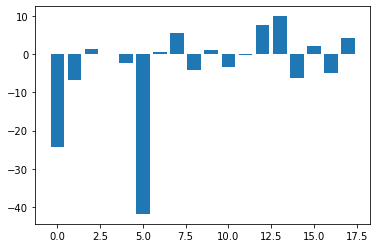

In [19]:
# Checking the importance of features
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Evaluate the Model: Measure the Mean Sqaure Error

In [20]:
# Model is evaluated by measuring Mean squared error
print("Mean squared error is: ", mean_squared_error(testing_label, y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean squared error is:  1026.3522058456917
Weights:  [-24.27726837  -6.81243042   1.37395812   0.08109207  -2.47970361
 -41.77909482   0.60480367   5.4991345   -4.24121884   1.108054
  -3.51070366  -0.20100231   7.48059972   9.86613142  -6.16105806
   2.00507221  -4.88708307   4.28682532]
Intercept:  764.4310700509961


In [21]:
training_error= mean_absolute_error(training_label, y_train_pred)
print('MAE: %.3f' % training_error)
error= mean_absolute_error(testing_label, y_predicted)
print('MAE: %.3f' % error)

MAE: 61.074
MAE: 26.529


<Figure size 432x288 with 0 Axes>

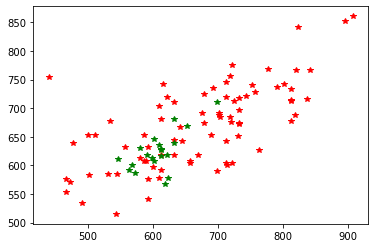

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(training_label, y_train_pred,'*r')
plt.plot(testing_label, y_predicted, '*g')
plt.figure()


In [23]:

x = training_data.iloc[:,14]
x.shape
y_train_pred.shape

(80,)

In [24]:
x1 = testing_data.iloc[:,14]
x.shape
y_predicted.shape

(20,)

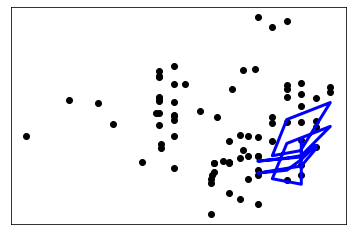

In [25]:
plt.scatter(x, y_train_pred, color="black")
plt.plot(x1, y_predicted, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#  Prediction for the new sample

In [26]:
#Just for checking I have taken testing sample

In [27]:
print('input features')
testing_data.iloc[3]

input features


Location          15.0
Seed              21.0
N                110.0
P                 70.0
K                 50.0
Soil Fertlity      2.0
mt1               31.0
mt2               32.0
mt3               44.0
mt4               48.0
mt5               47.0
mt6               50.0
mt7               46.0
mt8               46.0
mt9               41.0
mt10              35.0
mt11              31.0
mt12              29.0
Name: 83, dtype: float64

In [28]:
print('Yield')
testing_label.iloc[3]

Yield


632

In [29]:
# Here you can enter new input in array below

In [30]:
test_sample= np.array([15,21,110,70,50,2,31,32,44,48,47,50,46,46,41,35,31,29])
test_sample

array([ 15,  21, 110,  70,  50,   2,  31,  32,  44,  48,  47,  50,  46,
        46,  41,  35,  31,  29])

In [31]:
test_sample.shape

(18,)

In [32]:
type(test_sample)

numpy.ndarray

In [33]:
test_sample.ndim

1

In [35]:
test_sample=test_sample.reshape(1,18)
print(test_sample.shape)
print(test_sample.ndim)

(1, 18)
2


In [36]:
y_predicted = model.predict(test_sample)

In [37]:
y_predicted

array([681.06260495])